<a href="https://colab.research.google.com/github/mdld/flux/blob/main/STUDY02_TS_CLASSIFY_v0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

updated 28 oct

# Set Up

In [114]:
# all the constants to tune the model etc. live here
BATCH_SIZE=32
CLASSES=6
LAYER_COUNT=5
HISTORY_SIZE=32 # I made this a power of 2 for the dilated convolutions to fit nicely

In [115]:
from tensorflow import keras



In [116]:
import os
try:
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/.shortcut-targets-by-id/1Ceqqrb_wsA6SDV82I0HBzLQ17ezMt9v2/MariePHD
except ImportError:
  print("Can't import colab drive, hopefully this means you're running locally")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1Ceqqrb_wsA6SDV82I0HBzLQ17ezMt9v2/MariePHD


In [117]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Normalise Function


In [118]:
def normalize(dataset):
    firstrow = dataset.iloc[0]
    print("firstrow:")
    print(firstrow)
    dataNorm=(dataset-firstrow)           
    dataNorm["Label"]=dataset["Label"]
    return dataNorm

# Read Sensor Data

In [119]:
## Iterate through the Participant Sensor Datafiles, reading them into Pandas dataframes named file0 to file5

header_list = ["A0L", "A0V", "A1L", "A1V", "A2L", "A2V", "A3L", "A3V", "A4L", "A4V", "A5L", "A5V", "A6L", "A6V"]

alldata = None
i = -1
file_list_1 = ["STUDY02/Participant1/Data_230_56.csv",    #file0 surprise
             "STUDY02/Participant1/Data_230_57.csv",    #file1 sadness
             "STUDY02/Participant1/Data_230_58.csv",    #file2 joy
             "STUDY02/Participant1/Data_230_59.csv",    #file3 fear
             "STUDY02/Participant1/Data_230_60.csv",    #file4 anger
             "STUDY02/Participant1/Data_230_61.csv"]    #file5 disgust

file_list_2 = ["STUDY02/Participant2/Data_266_65.csv",    #file0 surprise
             "STUDY02/Participant2/Data_266_66.csv",    #file1 sadness
             "STUDY02/Participant2/Data_266_67.csv",    #file2 joy
             "STUDY02/Participant2/Data_266_68.csv",    #file3 fear
             "STUDY02/Participant2/Data_266_69.csv",    #file4 anger
             "STUDY02/Participant2/Data_266_70.csv"]    #file5 disgust      

file_list_3 = ["STUDY02/Participant3/Data_267_71.csv",    #file0 surprise
             "STUDY02/Participant3/Data_267_72.csv",    #file1 sadness
             "STUDY02/Participant3/Data_267_73.csv",    #file2 joy
             "STUDY02/Participant3/Data_267_74.csv",    #file3 fear
             "STUDY02/Participant3/Data_267_75.csv",    #file4 anger
             "STUDY02/Participant3/Data_267_76.csv"]    #file5 disgust 

file_list_4 = ["STUDY02/Participant4/Data_267_77.csv",    #file0 surprise
             "STUDY02/Participant4/Data_267_78.csv",    #file1 sadness
             "STUDY02/Participant4/Data_267_79.csv",    #file2 joy
             "STUDY02/Participant4/Data_267_80.csv",    #file3 fear
             "STUDY02/Participant4/Data_267_81.csv",    #file4 anger
             "STUDY02/Participant4/Data_267_82.csv"]    #file5 disgust    

print(file_list_1)    

participants = 4 - 1
file_list = []

for p in range(0,participants):    
    i = -1
    file_list = [file_list_1,file_list_2,file_list_3,file_list_4]
    for f in file_list[p]:
      print(f)
      i = i + 1        
      #file_name = 'file'+str(i) 
      file = pd.read_csv(f,sep=",",names=header_list,skiprows=3)                              # study02 code
      file = file.drop(["A0L","A0V","A1L","A2L","A3L","A4L","A5L","A6L"], axis=1)               # study02 code - drop label columns
      file.insert(0,'Label',i)  # add label column with file number label (represents emotion class)
      #print(file.tail(1))
      file = file.iloc[:-1 , :]
      file = normalize(file)  # use JM's normalize function (above)

      alldata = pd.concat([alldata, file], axis=0)  # combine all 6 datasets into one

      

      # convert to numpy array (all data, all 6 classes)
      alldata_np = alldata.to_numpy()
      x_data = alldata_np[:,1:]
      y_data = alldata_np[:,0]

#print(alldata.head())
#print(alldata.tail())

print(alldata.describe())


['STUDY02/Participant1/Data_230_56.csv', 'STUDY02/Participant1/Data_230_57.csv', 'STUDY02/Participant1/Data_230_58.csv', 'STUDY02/Participant1/Data_230_59.csv', 'STUDY02/Participant1/Data_230_60.csv', 'STUDY02/Participant1/Data_230_61.csv']
STUDY02/Participant1/Data_230_56.csv
firstrow:
Label      0
A1V      162
A2V      159
A3V      173
A4V      167
A5V      162
A6V      171
Name: nan, dtype: int64
STUDY02/Participant1/Data_230_57.csv
firstrow:
Label      1.0
A1V      138.0
A2V      136.0
A3V      148.0
A4V      143.0
A5V      147.0
A6V      148.0
Name: nan, dtype: float64
STUDY02/Participant1/Data_230_58.csv
firstrow:
Label      2.0
A1V      139.0
A2V      138.0
A3V      151.0
A4V      143.0
A5V      141.0
A6V      149.0
Name: nan, dtype: float64
STUDY02/Participant1/Data_230_59.csv
firstrow:
Label      3
A1V      133
A2V      128
A3V      144
A4V      135
A5V      133
A6V      140
Name: nan, dtype: int64
STUDY02/Participant1/Data_230_60.csv
firstrow:
Label      4.0
A1V      125.0
A2

In [120]:
alldata.describe()

,Label,A1V,A2V,A3V,A4V,A5V,A6V
count,20101.000000,20101.000000,20101.000000,20101.000000,20101.000000,20101.000000,20101.000000
mean,2.356102,2.449430,2.010049,1.385006,3.069599,3.870156,2.193373
std,1.712248,10.265364,8.653116,9.600719,10.526327,12.101283,10.150758
min,0.000000,-65.000000,-74.000000,-76.000000,-115.000000,-155.000000,-124.000000
25%,1.000000,-3.000000,-3.000000,-4.000000,-3.000000,-4.000000,-3.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
75%,4.000000,7.000000,7.000000,7.000000,8.000000,10.000000,8.000000
max,5.000000,88.000000,50.000000,54.000000,63.000000,88.000000,57.000000


# Prepare data using Joe's generator code

In [121]:
from kerasgenerators import *

In [122]:
print("ORIG:",x_data.shape,y_data.shape)

ORIG: (20101, 6) (20101,)


In [123]:
in_dataset=LabelledHistoryGenerator(source_x=x_data,label_y=y_data,batch_size=BATCH_SIZE,history_x=HISTORY_SIZE,history_y=1)

in_dataset=ShuffledGenerator(in_dataset,seed=3)

train_dataset=TestSplitGenerator(in_dataset,split=0.5,is_test=False)
non_training_dataset=TestSplitGenerator(in_dataset,split=0.5,is_test=True)

validate_dataset=TestSplitGenerator(non_training_dataset,split=0.5,is_test=False)
test_dataset=TestSplitGenerator(non_training_dataset,split=0.5,is_test=True)


# Keras

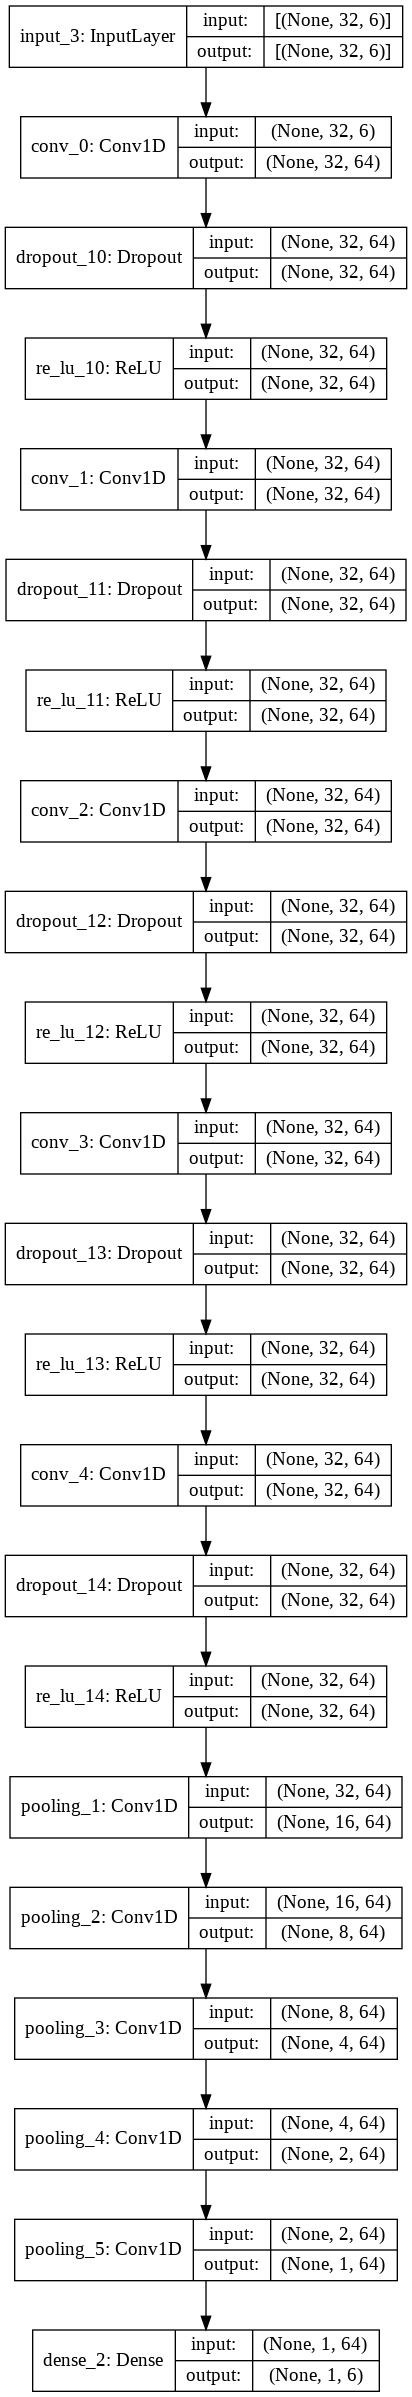

In [124]:

num_classes = CLASSES

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    this_layer=input_layer
    for c in range(LAYER_COUNT):
      this_layer = keras.layers.Conv1D(filters=64, kernel_size=2,dilation_rate=2**c, padding="same",name="conv_%d"%c)(this_layer)
#      this_layer = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(this_layer)
      this_layer=keras.layers.Dropout(0.2)(this_layer)
      this_layer = keras.layers.ReLU()(this_layer)

    # rather than average pooling, this uses a stack of width 2 convolutions which do 
    # some kind of pooling operation but which is no longer fixed
    count=0
    while this_layer.shape[-2]>1:
      count+=1
      this_layer=keras.layers.Conv1D(filters=64,kernel_size=2,strides=2,padding="valid",name="pooling_%d"%count)(this_layer)

#    this_layer = keras.layers.GlobalAveragePooling1D()(this_layer)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(this_layer)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


#model = make_model(input_shape=x_train.shape[1:])
model = make_model(train_dataset[0][0].shape[1:])
keras.utils.plot_model(model, show_shapes=True)


In [125]:
train_dataset[0][0].shape[1:]

(32, 6)

In [126]:
epochs = 200
#epochs = 500
 
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_sparse_categorical_accuracy"
    )
    #,
    #keras.callbacks.ReduceLROnPlateau(
    #    monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    #)
    #,
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
#history = model.fit(
#    x_train,
#    y_train,
#    batch_size=batch_size,
#    epochs=epochs,
#    callbacks=callbacks,
#    validation_split=0.2,
#    verbose=1,
#)
 
 
history = model.fit(train_dataset,epochs=epochs,callbacks=callbacks,validation_data=validate_dataset)

Epoch 1/200
314/314 [==============================] - 14s 41ms/step - loss: 1.8038 - sparse_categorical_accuracy: 0.2667 - val_loss: 1.6821 - val_sparse_categorical_accuracy: 0.2416
Epoch 2/200
314/314 [==============================] - 12s 39ms/step - loss: 1.6103 - sparse_categorical_accuracy: 0.3295 - val_loss: 1.4221 - val_sparse_categorical_accuracy: 0.4144
Epoch 3/200
314/314 [==============================] - 12s 39ms/step - loss: 1.3954 - sparse_categorical_accuracy: 0.4419 - val_loss: 1.4748 - val_sparse_categorical_accuracy: 0.4295
Epoch 4/200
314/314 [==============================] - 12s 39ms/step - loss: 1.3488 - sparse_categorical_accuracy: 0.4585 - val_loss: 1.3428 - val_sparse_categorical_accuracy: 0.5850
Epoch 5/200
314/314 [==============================] - 12s 39ms/step - loss: 1.1750 - sparse_categorical_accuracy: 0.5195 - val_loss: 1.5053 - val_sparse_categorical_accuracy: 0.4303
Epoch 6/200
314/314 [==============================] - 12s 39ms/step - loss: 1.1980 -

In [127]:
model = keras.models.load_model("best_model.h5")
 
model.evaluate(train_dataset)
test_loss, test_acc = model.evaluate(test_dataset)
 
print("Test accuracy", test_acc)
print("Test loss", test_loss)

156/156 [==============================] - 4s 23ms/step - loss: 1.1321 - sparse_categorical_accuracy: 0.8700
Test accuracy 0.8699919581413269
Test loss 1.1320778131484985


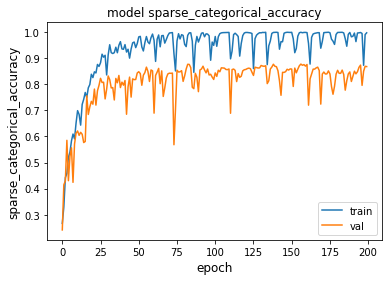

<Figure size 432x288 with 0 Axes>

In [128]:
metric = "sparse_categorical_accuracy"
 
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
#plt.close()
plt.savefig(('STUDY02/6_classes.png'))

In [129]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 6)]           0         
_________________________________________________________________
conv_0 (Conv1D)              (None, 32, 64)            832       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
re_lu_10 (ReLU)              (None, 32, 64)            0         
_________________________________________________________________
conv_1 (Conv1D)              (None, 32, 64)            8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 64)            0         
_________________________________________________________________
re_lu_11 (ReLU)              (None, 32, 64)            0   

In [130]:
#in_dataset.__dict__

In [131]:
#train_dataset.__dict__

In [132]:
#train_dataset[0][0].shape[1:]

In [133]:
#validate_dataset.__dict__

In [134]:
#validate_dataset[0][0].shape[1:]

In [135]:
def make_confusion_matrix(dataset,title):
  print("================")
  print(title)
  print("================")
  print("CONFUSION MATRIX")
  print("================")
  labels = np.concatenate([values[1] for values in dataset])# get all the label batches
  predictionProbabilities= model.predict(dataset) # get the predictions as a probability distribution
  
 
 
  predictions = tf.math.argmax(
    predictionProbabilities, axis=2, output_type=tf.dtypes.int64, name=None) # take argmax - predictions and labels are both now individual numbered values
 
  print(labels.shape, predictions.shape)
  matrix=tf.math.confusion_matrix(
    tf.squeeze(labels),tf.squeeze( predictions), num_classes=6
  )
  print(matrix)
  print("================")
  print("Frequencies")
  print("================")
  lab_freq=tf.reduce_sum(matrix,axis=1)
  pred_freq=tf.reduce_sum(matrix,axis=0)
  print("Labels frequencies:   ",lab_freq)
  print("Predicted frequencies:",pred_freq)
 
  print("Correct predictions:",(["%2.2f"%((matrix[c,c] / lab_freq[c]).numpy()) for c in range(6)]))

In [136]:
make_confusion_matrix(test_dataset,"TEST DATA CONFUSION MATRIX")

TEST DATA CONFUSION MATRIX
CONFUSION MATRIX
(4992, 1) (4992, 1)
tf.Tensor(
[[784  82  34  25   0   3]
 [ 49 746   0   0   5  47]
 [  7  17 564   0   5   0]
 [ 70  64  29 901  12  21]
 [  0  17  26  16 700   1]
 [ 29   8   0   0  82 648]], shape=(6, 6), dtype=int32)
Frequencies
Labels frequencies:    tf.Tensor([ 928  847  593 1097  760  767], shape=(6,), dtype=int32)
Predicted frequencies: tf.Tensor([939 934 653 942 804 720], shape=(6,), dtype=int32)
Correct predictions: ['0.84', '0.88', '0.95', '0.82', '0.92', '0.84']


In [137]:
make_confusion_matrix(train_dataset,"TRAIN DATA CONFUSION MATRIX")

TRAIN DATA CONFUSION MATRIX
CONFUSION MATRIX
(10048, 1) (10048, 1)
tf.Tensor(
[[1787    0    0    0    0    0]
 [   0 1866    0    0    0    0]
 [   0    0 1492    2    0    0]
 [   0    0    0 1757    0    0]
 [   0    0    0    0 1619    1]
 [   0    0    0    0    0 1524]], shape=(6, 6), dtype=int32)
Frequencies
Labels frequencies:    tf.Tensor([1787 1866 1494 1757 1620 1524], shape=(6,), dtype=int32)
Predicted frequencies: tf.Tensor([1787 1866 1492 1759 1619 1525], shape=(6,), dtype=int32)
Correct predictions: ['1.00', '1.00', '1.00', '1.00', '1.00', '1.00']


In [138]:
make_confusion_matrix(validate_dataset,"VALIDATION DATA CONFUSION MATRIX")

VALIDATION DATA CONFUSION MATRIX
CONFUSION MATRIX
(5024, 1) (5024, 1)
tf.Tensor(
[[1128   41    0   91    0    5]
 [  93  582    0   19    5   13]
 [  11   33  753    0    0   11]
 [  13   15   17  878   18    7]
 [   0  104   16   14  575   12]
 [   7   21    0   16   35  491]], shape=(6, 6), dtype=int32)
Frequencies
Labels frequencies:    tf.Tensor([1265  712  808  948  721  570], shape=(6,), dtype=int32)
Predicted frequencies: tf.Tensor([1252  796  786 1018  633  539], shape=(6,), dtype=int32)
Correct predictions: ['0.89', '0.82', '0.93', '0.93', '0.80', '0.86']


In [139]:
import csv   
import datetime
    
# headers
header = [['Run Date Time', 'Number of Classes', 'Batch Size', 'History Size','Epochs','Test Accuracy','Test Loss']]

# data rows of csv file  
rows = [[datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"), CLASSES, BATCH_SIZE, HISTORY_SIZE, epochs, test_acc, test_loss ]]
    
# name of csv file  
filename = "outfile_fs_6_classes_info.csv"
    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  

    # writing the header row 
    csvwriter.writerows(header)         

    # writing the data rows  
    csvwriter.writerows(rows) 